# Motivational Example (From Foundational NN)


reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

## Download Data

In [1]:
import numpy as np

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
from keras.datasets import mnist

In [4]:
mnist.load_data?

https://keras.io/datasets/

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Explore Data

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
type(x_train)

numpy.ndarray

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train.shape

(60000,)

In [24]:
y_train[2]

4

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
import matplotlib.pyplot as plt

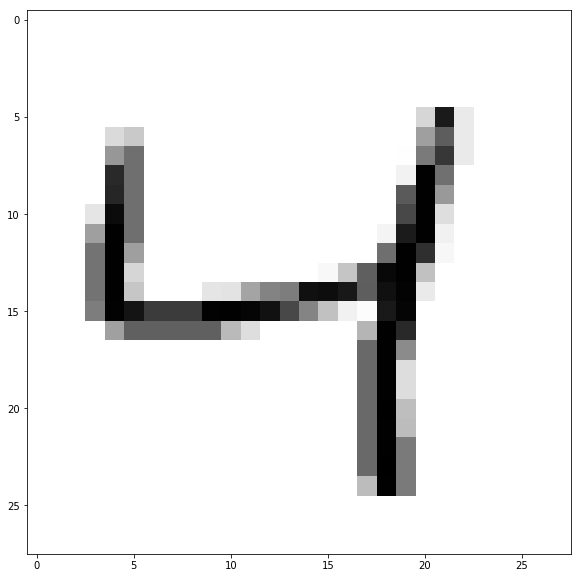

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap='Greys');

In [19]:
x_test.shape

(10000, 28, 28)

In [20]:
y_test.shape

(10000,)

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## NN Architecture

In [19]:
from keras import models
from keras import layers

https://keras.io/getting-started/sequential-model-guide/

In [20]:
model = models.Sequential()

In [ ]:
layers.Dense?

In [21]:
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28 * 28,)))

In [22]:
model.add(layers.Dense(units=10,
                       activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
x_train_input = x_train.reshape((60000, 28 * 28))

In [25]:
x_train_input.dtype

dtype('uint8')

In [26]:
x_train_input.min()

0

In [27]:
x_train_input.max()

255

In [28]:
x_train_input = x_train_input.astype('float32') / 255

In [29]:
x_test_input = x_test.reshape((10000, 28 * 28))

In [30]:
x_test_input = x_test_input.astype('float32') / 255

compile model

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one hot encode the target variable 

In [32]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model fitting

In [33]:
model.fit(x_train_input, y_train,
          epochs=10,
          batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.3141 - acc: 0.9111
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1285 - acc: 0.9620
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0848 - acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0616 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0478 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0364 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0283 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0226 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0175 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0140 - acc: 0.9963

test the model on test set or predict

In [34]:
eval_loss, eval_acc = model.evaluate(x_test_input, 
                                     y_test)

10000/10000 [==============================] - 1s 60us/step


In [35]:
print('Test accuracy: {}'.format(eval_acc))

Test accuracy: 0.9815
